In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})



/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import data

maxlon = 160
minlon = 140

Tok1 = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tokyo1_vSept16.csv', sep = ',')
Tok1['density'] = sw.rho(Tok1['S'].values,Tok1['T'].values,0)
Tok1 = Tok1[(Tok1['Lon']>minlon) & (Tok1['Lon']<maxlon)]

Tok3 = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tokyo3_vSept16.csv', sep = ',')
Tok3['density'] = sw.rho(Tok3['S'].values,Tok3['T'].values,0)
Tok3 = Tok3[(Tok3['Lon']>minlon) & (Tok3['Lon']<maxlon)]

Tian = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tianjin2_vSept16.csv', sep = ',')
Tian['density'] = sw.rho(Tian['S'].values,Tian['T'].values,0)
Tian = Tian[(Tian['Lon']>minlon) & (Tian['Lon']<maxlon)]

print Tian.columns

Index([u'Timestamp', u'Lat', u'Lon', u'S', u'T', u'Fluo', u'TrueO2Ar',
       u'O2Arsat', u'O2Arbiosat', u'MLD (WOA13)', u'Wkn', u'Air-sea flux',
       u'density'],
      dtype='object')


['../data/sla/dt_global_allsat_msla_h_20110519_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20110520_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20110923_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20110924_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20110925_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20120727_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20120728_20140106.nc']


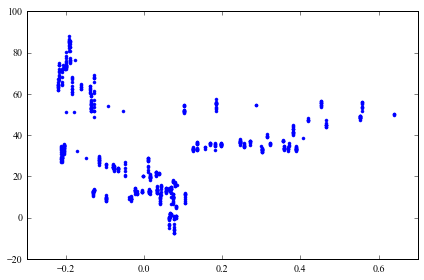

In [7]:
# import SSH data

files = glob.glob('../data/sla/*.nc')
print files

Tok1_SSH = Dataset(files[0], mode='r')

Tok1_ssh = pd.DataFrame()

sla = np.squeeze(Tok1_SSH.variables['sla'][:])
lons = Tok1_SSH.variables['lon'][:]
lats = Tok1_SSH.variables['lat'][:]

Tok1_SSH.close()

sla_track = []
spacing = 0.25

x = lons
y = lats

xnew = Tok1['Lon'].values
ynew = Tok1['Lat'].values

for n in range(len(Tok1)):
    
    k = np.where((xnew[n] < (x + (spacing*0.5))) & (xnew[n] > (x - (spacing*0.5))))
    l = np.where((ynew[n] < (y + (spacing*0.5))) & (ynew[n] > (y - (spacing*0.5))))
    m = np.mean(sla[l, k])
    if np.isfinite(m):
        sla_track.append(m)
    else:
        sla_track.append(np.nan)

    #print xnew[n], ynew[n], k, l, m

sla_trackT1 = sla_track
plt.plot(sla_trackT1, Tok1['Air-sea flux'], '.')
plt.show()

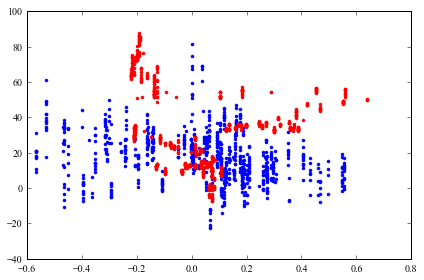

In [9]:
Tok3_SSH = Dataset(files[2], mode='r')
slaT3 = np.squeeze(Tok3_SSH.variables['sla'][:])
lons = Tok3_SSH.variables['lon'][:]
lats = Tok3_SSH.variables['lat'][:]

Tok3_SSH.close()

sla_track = []
spacing = 0.25

x = lons
y = lats

xnew = Tok3['Lon'].values
ynew = Tok3['Lat'].values

for n in range(len(Tok3)):
    
    k = np.where((xnew[n] < (x + (spacing*0.5))) & (xnew[n] > (x - (spacing*0.5))))
    l = np.where((ynew[n] < (y + (spacing*0.5))) & (ynew[n] > (y - (spacing*0.5))))
    m = np.mean(sla[l, k])
    if np.isfinite(m):
        sla_track.append(m)
    else:
        sla_track.append(np.nan)

    #print xnew[n], ynew[n], k, l, m

    sla_trackT3 = sla_track
    
plt.plot(sla_trackT3, Tok3['Air-sea flux'], '.')
plt.plot(sla_trackT1, Tok1['Air-sea flux'], '.r')
plt.show()

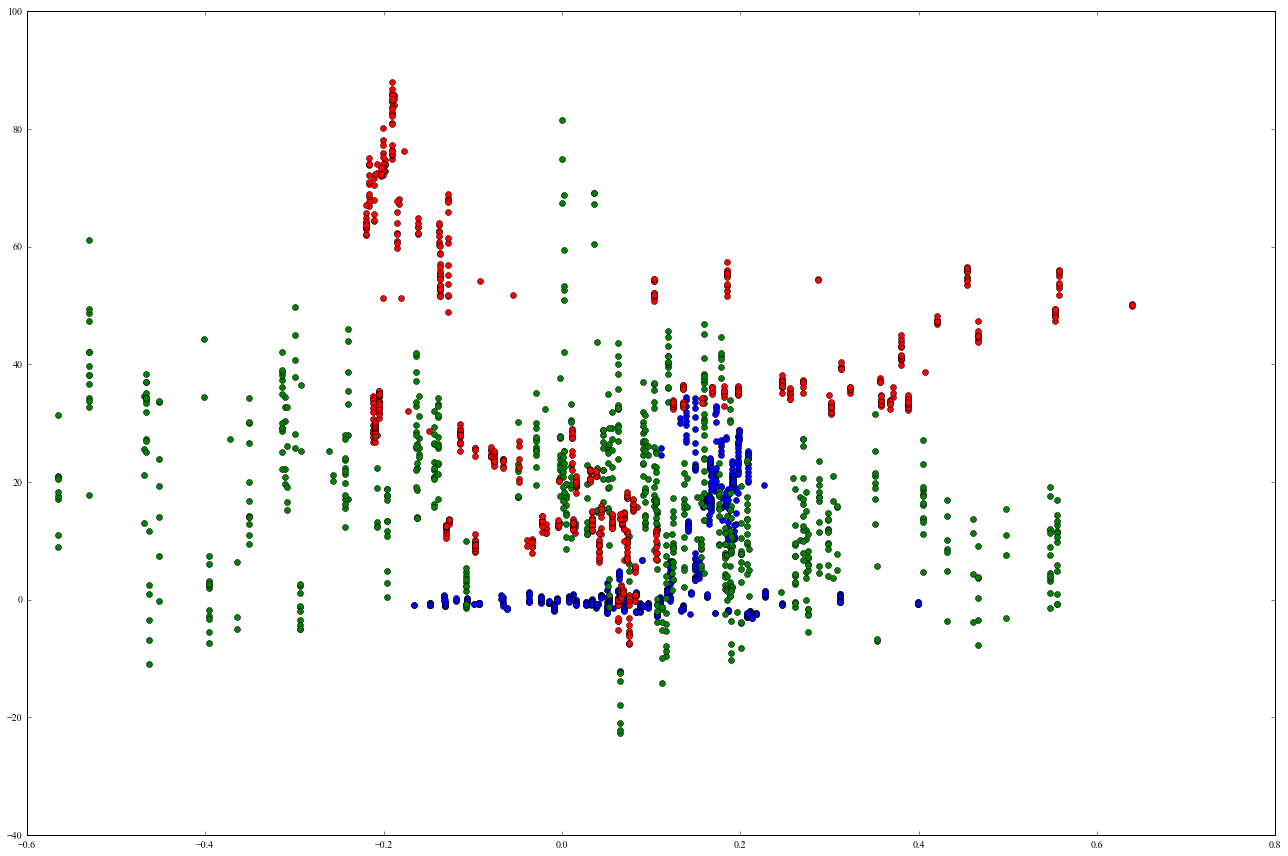

In [13]:
T_SSH = Dataset(files[5], mode='r')
slaT = np.squeeze(T_SSH.variables['sla'][:])
lons = T_SSH.variables['lon'][:]
lats = T_SSH.variables['lat'][:]

T_SSH.close()

sla_track = []
spacing = 0.25

x = lons
y = lats

xnew = Tian['Lon'].values
ynew = Tian['Lat'].values

for n in range(len(Tian)):
    
    k = np.where((xnew[n] < (x + (spacing*0.5))) & (xnew[n] > (x - (spacing*0.5))))
    l = np.where((ynew[n] < (y + (spacing*0.5))) & (ynew[n] > (y - (spacing*0.5))))
    m = np.mean(slaT[l, k])
    if np.isfinite(m):
        sla_track.append(m)
    else:
        sla_track.append(np.nan)

    #print xnew[n], ynew[n], k, l, m

    
    fig0 = plt.figure(1, figsize=(18,12), dpi = 600)
plt.plot(sla_track, Tian['Air-sea flux'], 'o')
plt.plot(sla_trackT3, Tok3['Air-sea flux'], 'og')
plt.plot(sla_trackT1, Tok1['Air-sea flux'], 'or')
plt.show()

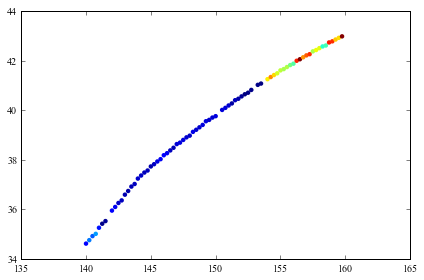

In [14]:
T_SSH = Dataset(files[5], mode='r')
slaT = np.squeeze(T_SSH.variables['sla'][:])
lons = T_SSH.variables['lon'][:]
lats = T_SSH.variables['lat'][:]

ncp = Tian['Air-sea flux'].values

T_SSH.close()

sla_track = []
new_lat = []
spacing = 0.25

x = lons
y = lats

xnew = Tian['Lon'].values
ynew = Tian['Lat'].values

x = np.arange(140, 160.25, 0.25)

for n in range(len(x)):
    
    k = np.where((xnew < (x[n] + (spacing*0.5))) & (xnew > (x[n] - (spacing*0.5))))
    #print ynew[k], np.mean(ynew[k])
    #l = np.where((np.mean(ynew[k]) < (y + (spacing*0.5))) & (np.mean(ynew[k]) > (y - (spacing*0.5))))
    
    l = np.mean(ynew[k])
    m = np.mean(ncp[k])
    if np.isfinite(m) & np.isfinite(l):
        sla_track.append(m)
        new_lat.append(l)
    else:
        sla_track.append(np.nan)
        new_lat.append(np.nan)

    #print xnew[n], ynew[n], k, l, m

plt.scatter(x, new_lat, c = sla_track, s = 20, lw = 0)
plt.show()